<a href="https://colab.research.google.com/github/alharbinouf/Project-/blob/main/AI(CSC%20562).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lime

In [ ]:
# Correct the import statement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('/content/KDDTrain+.txt')
test_df = pd.read_csv('/content/KDDTest+.txt')
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
df.head()




duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                    0.00                         0.03   
3                    0.00                         0.00   
4                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  1.00   
2                         0.04                  0.03   
3                         0.00                  0.00   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                   0.0                      0.00   
1                      1.00                   0.0                      0.00   
2                      0.01                   0.0                      0.01   
3                      0.00                   0.0                      0.00   
4                      0.00                   1.0                      1.00   

    attack  level  
0   normal     15  
1  neptune     19  
2   normal     21  
3   normal     21  
4  neptune     21  

[5 rows x 43 columns]

In [ ]:
df.loc[df['attack'] == "normal", "attack"] = 'normal'
df.loc[df['attack'] != 'normal', "attack"] = 'attack'

In [ ]:
test_df.loc[test_df['attack'] == "normal", "attack"] = 'normal'
test_df.loc[test_df['attack'] != 'normal', "attack"] = 'attack'

In [ ]:
df['attack'].value_counts()

attack
normal    67342
attack    58630
Name: count, dtype: int64

In [ ]:
df['attack'] = df['attack'].replace({'normal': 0, 'attack': 1})
test_df['attack'] = test_df['attack'].replace({'normal': 0, 'attack': 1})

<ipython-input-86-06b22567e9cb>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['attack'] = df['attack'].replace({'normal': 0, 'attack': 1})
<ipython-input-86-06b22567e9cb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['attack'] = test_df['attack'].replace({'normal': 0, 'attack': 1})


In [ ]:
print('Label distribution Training set:')
print(df['attack'].value_counts())
print()
print('Label distribution Test set:')
print(test_df['attack'].value_counts())

Label distribution Training set:
attack
0    67342
1    58630
Name: count, dtype: int64

Label distribution Test set:
attack
1    12832
0     9711
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']
# insert code to get a list of categorical columns into a variable, categorical_columns
categorical_columns=['protocol_type', 'service', 'flag']
 # Get the categorical values into a 2D numpy array
df_categorical_values = df[categorical_columns]
testdf_categorical_values = test_df[categorical_columns]
df_categorical_values.head()

protocol_type  service flag
0           udp    other   SF
1           tcp  private   S0
2           tcp     http   SF
3           tcp     http   SF
4           tcp  private  REJ

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: Label Encoding for the 'protocol_type' column
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['service'] = label_encoder.fit_transform(df['service'])
df['flag'] = label_encoder.fit_transform(df['flag'])
df['attack'] = label_encoder.fit_transform(df['attack'])


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example: Label Encoding for the 'protocol_type' column
label_encoder = LabelEncoder()
test_df['protocol_type'] = label_encoder.fit_transform(test_df['protocol_type'])
test_df['service'] = label_encoder.fit_transform(test_df['service'])
test_df['flag'] = label_encoder.fit_transform(test_df['flag'])
test_df['attack'] = label_encoder.fit_transform(test_df['attack'])


In [ ]:
print(df.columns)  # Check if 'attack' is present in the DataFrame


Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')


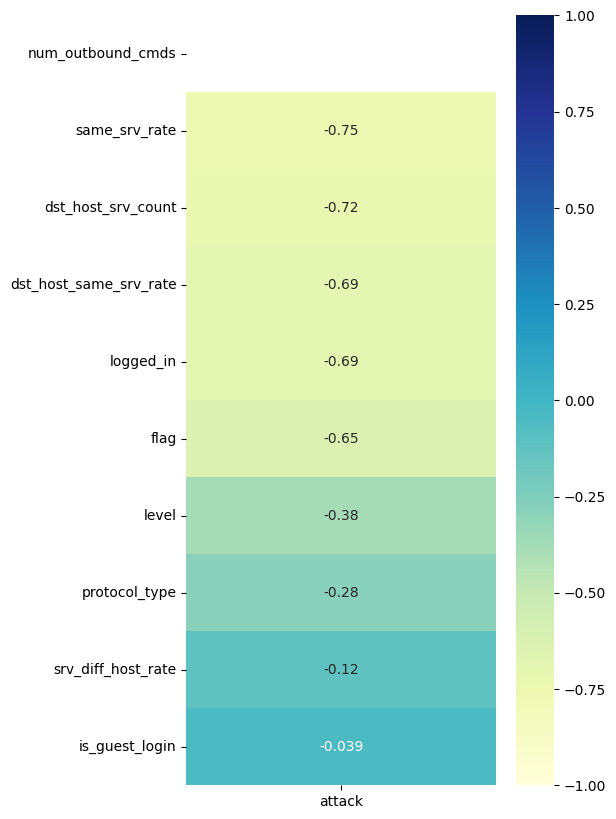

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if the 'attack' column exists
if 'attack' in df.columns:
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Select the correlations with 'attack', sort them, and pick the top 10 highest correlated features
    attack_corr = corr_matrix[['attack']].sort_values('attack', ascending=False).tail(10)

    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(5, 10))
    sns.heatmap(attack_corr, vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax)

    # Invert the y-axis to show the highest correlations on top
    ax.invert_yaxis()
    plt.show()
else:
    print("The column 'attack' is not found in the DataFrame.")


In [ ]:

df.drop(['level'],axis=1,inplace=True)
test_df.drop(['level'],axis=1,inplace=True)

In [ ]:
x=df.drop(['attack'],axis=1)
y=df['attack']

In [ ]:
from ast import mod
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model=xgb.XGBClassifier()
model.fit(x,y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
X_test = test_df.drop(columns=['attack'])  # Assuming 'attack' is the label column
y_test = test_df['attack']  # The target variable (labels)


In [ ]:
y_pred = model.predict(X_test)  # Generate predictions from your model


In [ ]:
accuracy = accuracy_score(y_test, y_pred)  # Use the true labels (y_test) and predicted labels (y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8016235638557424


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81      9711
           1       0.97      0.67      0.79     12832

    accuracy                           0.80     22543
   macro avg       0.83      0.82      0.80     22543
weighted avg       0.85      0.80      0.80     22543



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[9417  294]
 [4178 8654]]


In [ ]:
print(y.value_counts())

attack
0    67342
1    58630
Name: count, dtype: int64


In [ ]:

pip install lime

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x),  # Feature data (X_train)
    training_labels=np.array(y),  # Labels (y_train)
    mode="classification",  # Since this is a classification problem
    feature_names=x.columns.tolist(),  # List of feature names
    class_names=np.unique(y).astype(str),  # Class names (attack vs. non-attack)
    discretize_continuous=True  # Handle continuous features
)

In [ ]:

exp = explainer.explain_instance(X_test.iloc[1], model.predict_proba)

# Visualize the explanation (LIME will generate a bar plot showing feature contributions)
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

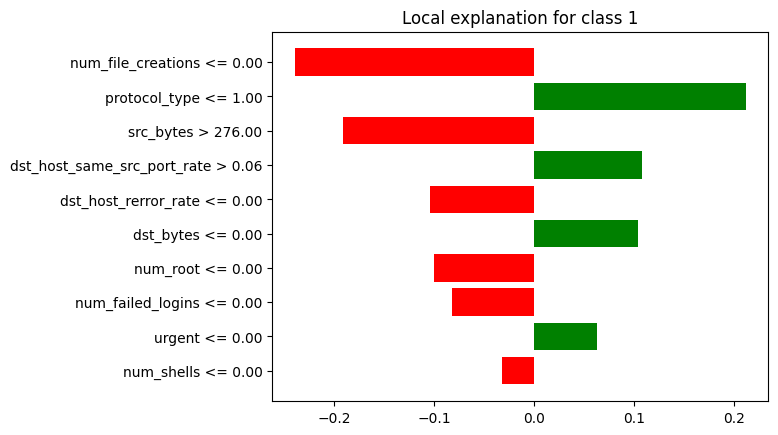

In [ ]:
fig_binary = exp.as_pyplot_figure()
fig_binary.show()

In [ ]:

exp = explainer.explain_instance(X_test.iloc[0], model.predict_proba)

# Visualize the explanation (LIME will generate a bar plot showing feature contributions)
exp.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.

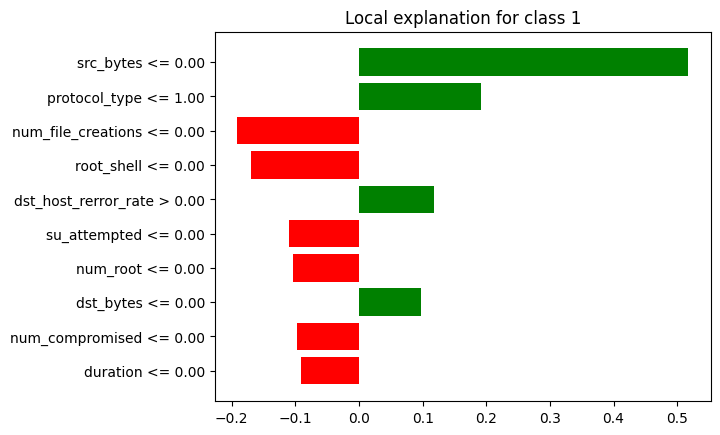

In [ ]:
fig_binary = exp.as_pyplot_figure()
fig_binary.show()

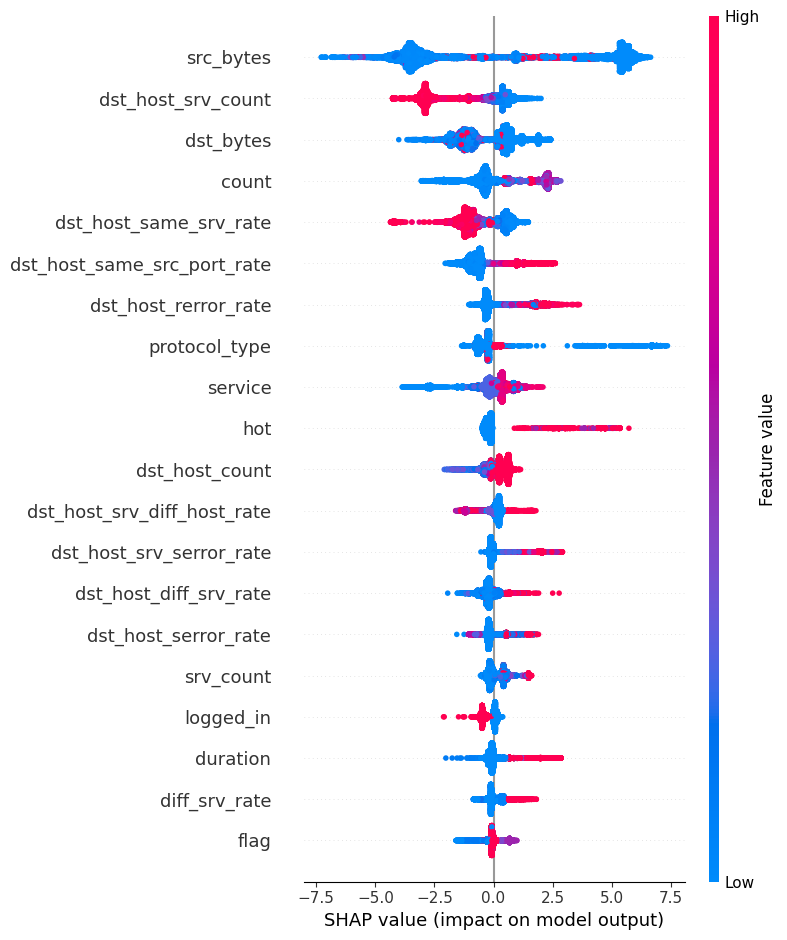

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot for global feature importance
shap.summary_plot(shap_values, X_test)

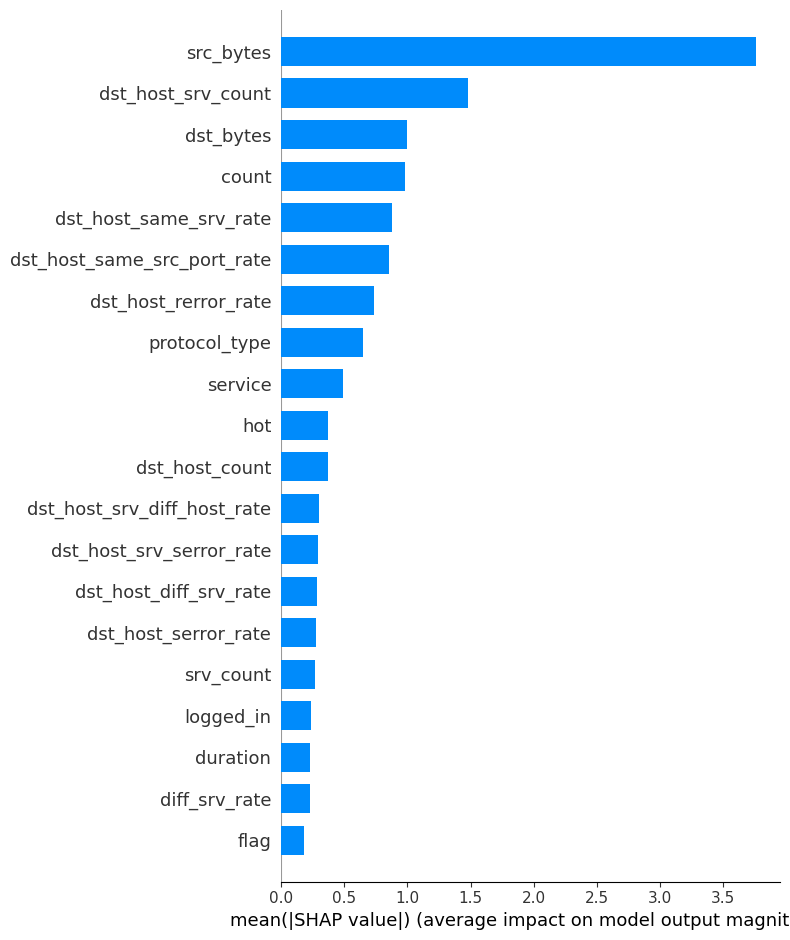

In [ ]:
shap.summary_plot(shap_values, x.values, feature_names=x.columns.tolist(), plot_type='bar')

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], x.iloc[0])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1], x.iloc[1])